In [1]:
#imprting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

Dataset - https://drive.google.com/file/d/1AnRf3cl-MflHd4JVK07Az3UdvemNRU4a/view?usp=sharing 
This breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. Attribute Information:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


In [3]:
df = pd.read_csv('./breast-cancer-wisconsin.csv')

# 2.	Data Visualization and Exploration

a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
b.	Print the description and shape of the dataset.
c.	Provide appropriate visualization to get an insight about the dataset.
d.	Try exploring the data and see what insights can be drawn from the dataset.


In [4]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df.shape

(699, 11)

In [7]:
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
df['Bare Nuclei']=df['Bare Nuclei'].replace(to_replace={'?':0})

In [9]:
df['Bare Nuclei']=df['Bare Nuclei'].astype(int)

In [10]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [12]:
data_clean(df)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [13]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [14]:
col_list = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',                    'Bland Chromatin',                 
'Normal Nucleoli',                
'Mitoses',                         
'Class']
for i in col_list:
    print('{} has unique values as {}'.format(i,df[i].unique()))

Clump Thickness has unique values as [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size has unique values as [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape has unique values as [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion has unique values as [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size has unique values as [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei has unique values as [ 1 10  2  4  3  9  7  0  5  8  6]
Bland Chromatin has unique values as [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli has unique values as [ 1  2  7  4  5  3 10  6  9  8]
Mitoses has unique values as [ 1  5  4  2  3  7 10  8  6]
Class has unique values as [2 4]


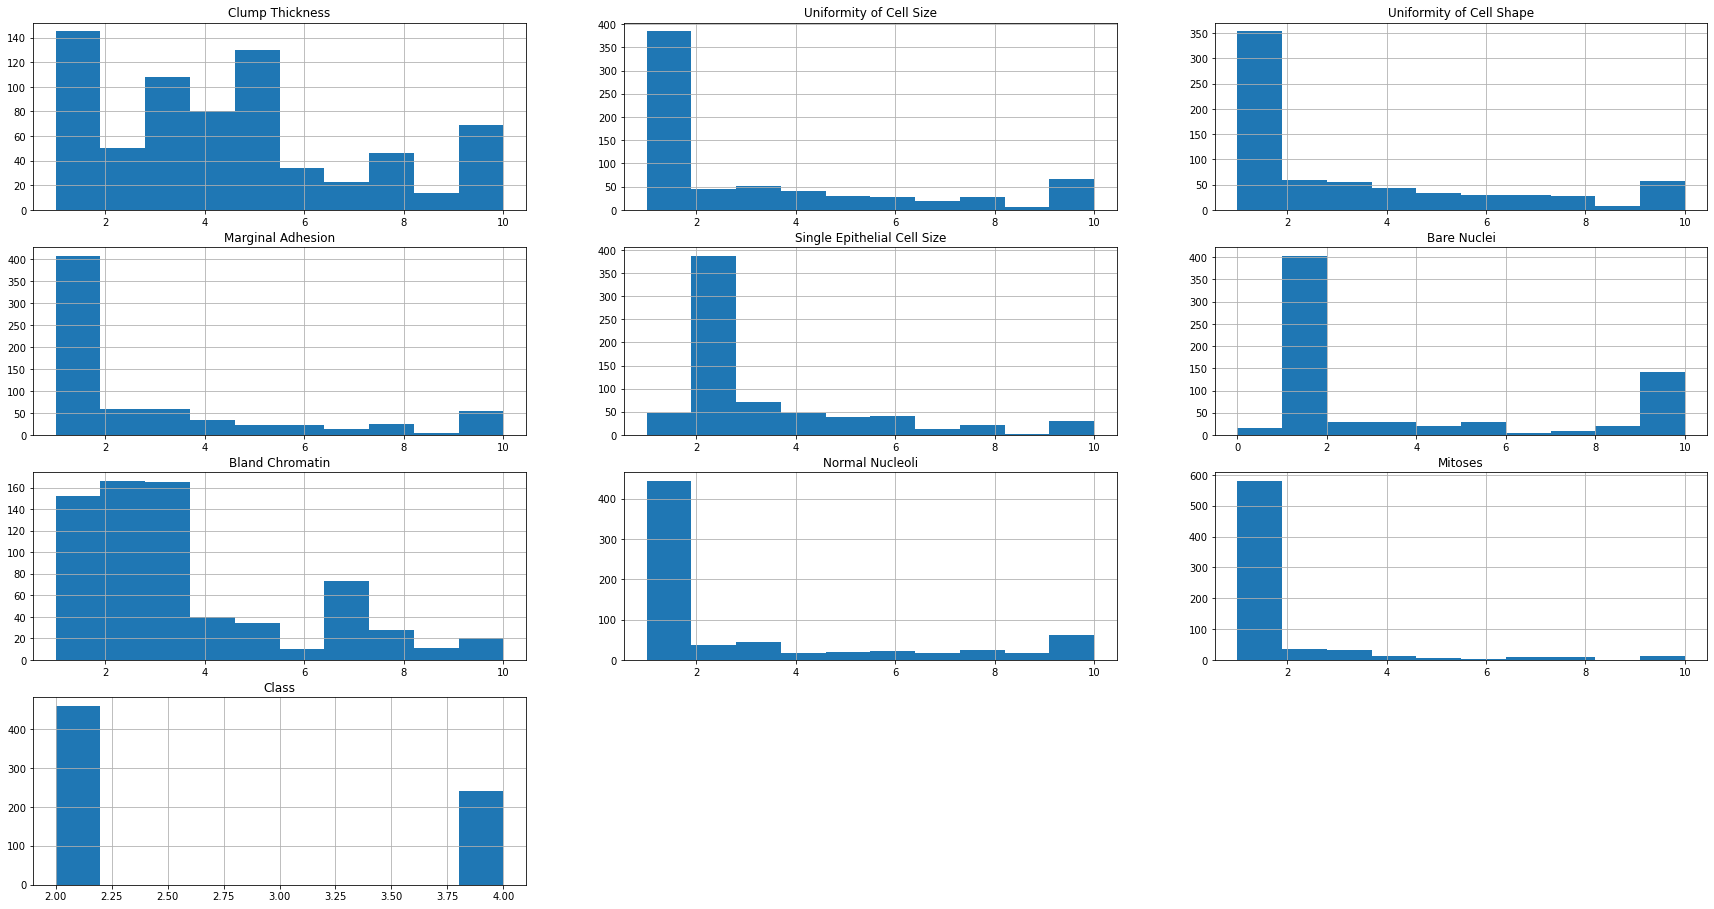

In [15]:
plot.figure(figsize=(30,20))
for i,feature in enumerate(col_list):
    plot.subplot(5,3,i+1)
    df[feature].hist()
    plot.title(feature)

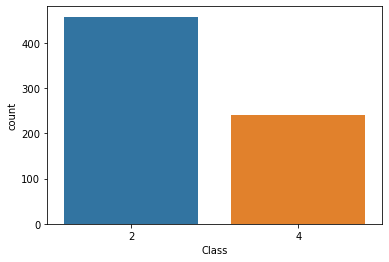

<Figure size 1440x1296 with 0 Axes>

In [16]:
sns.countplot(df.Class,label="count")
plot.figure(figsize=(20,18))
plot.show()

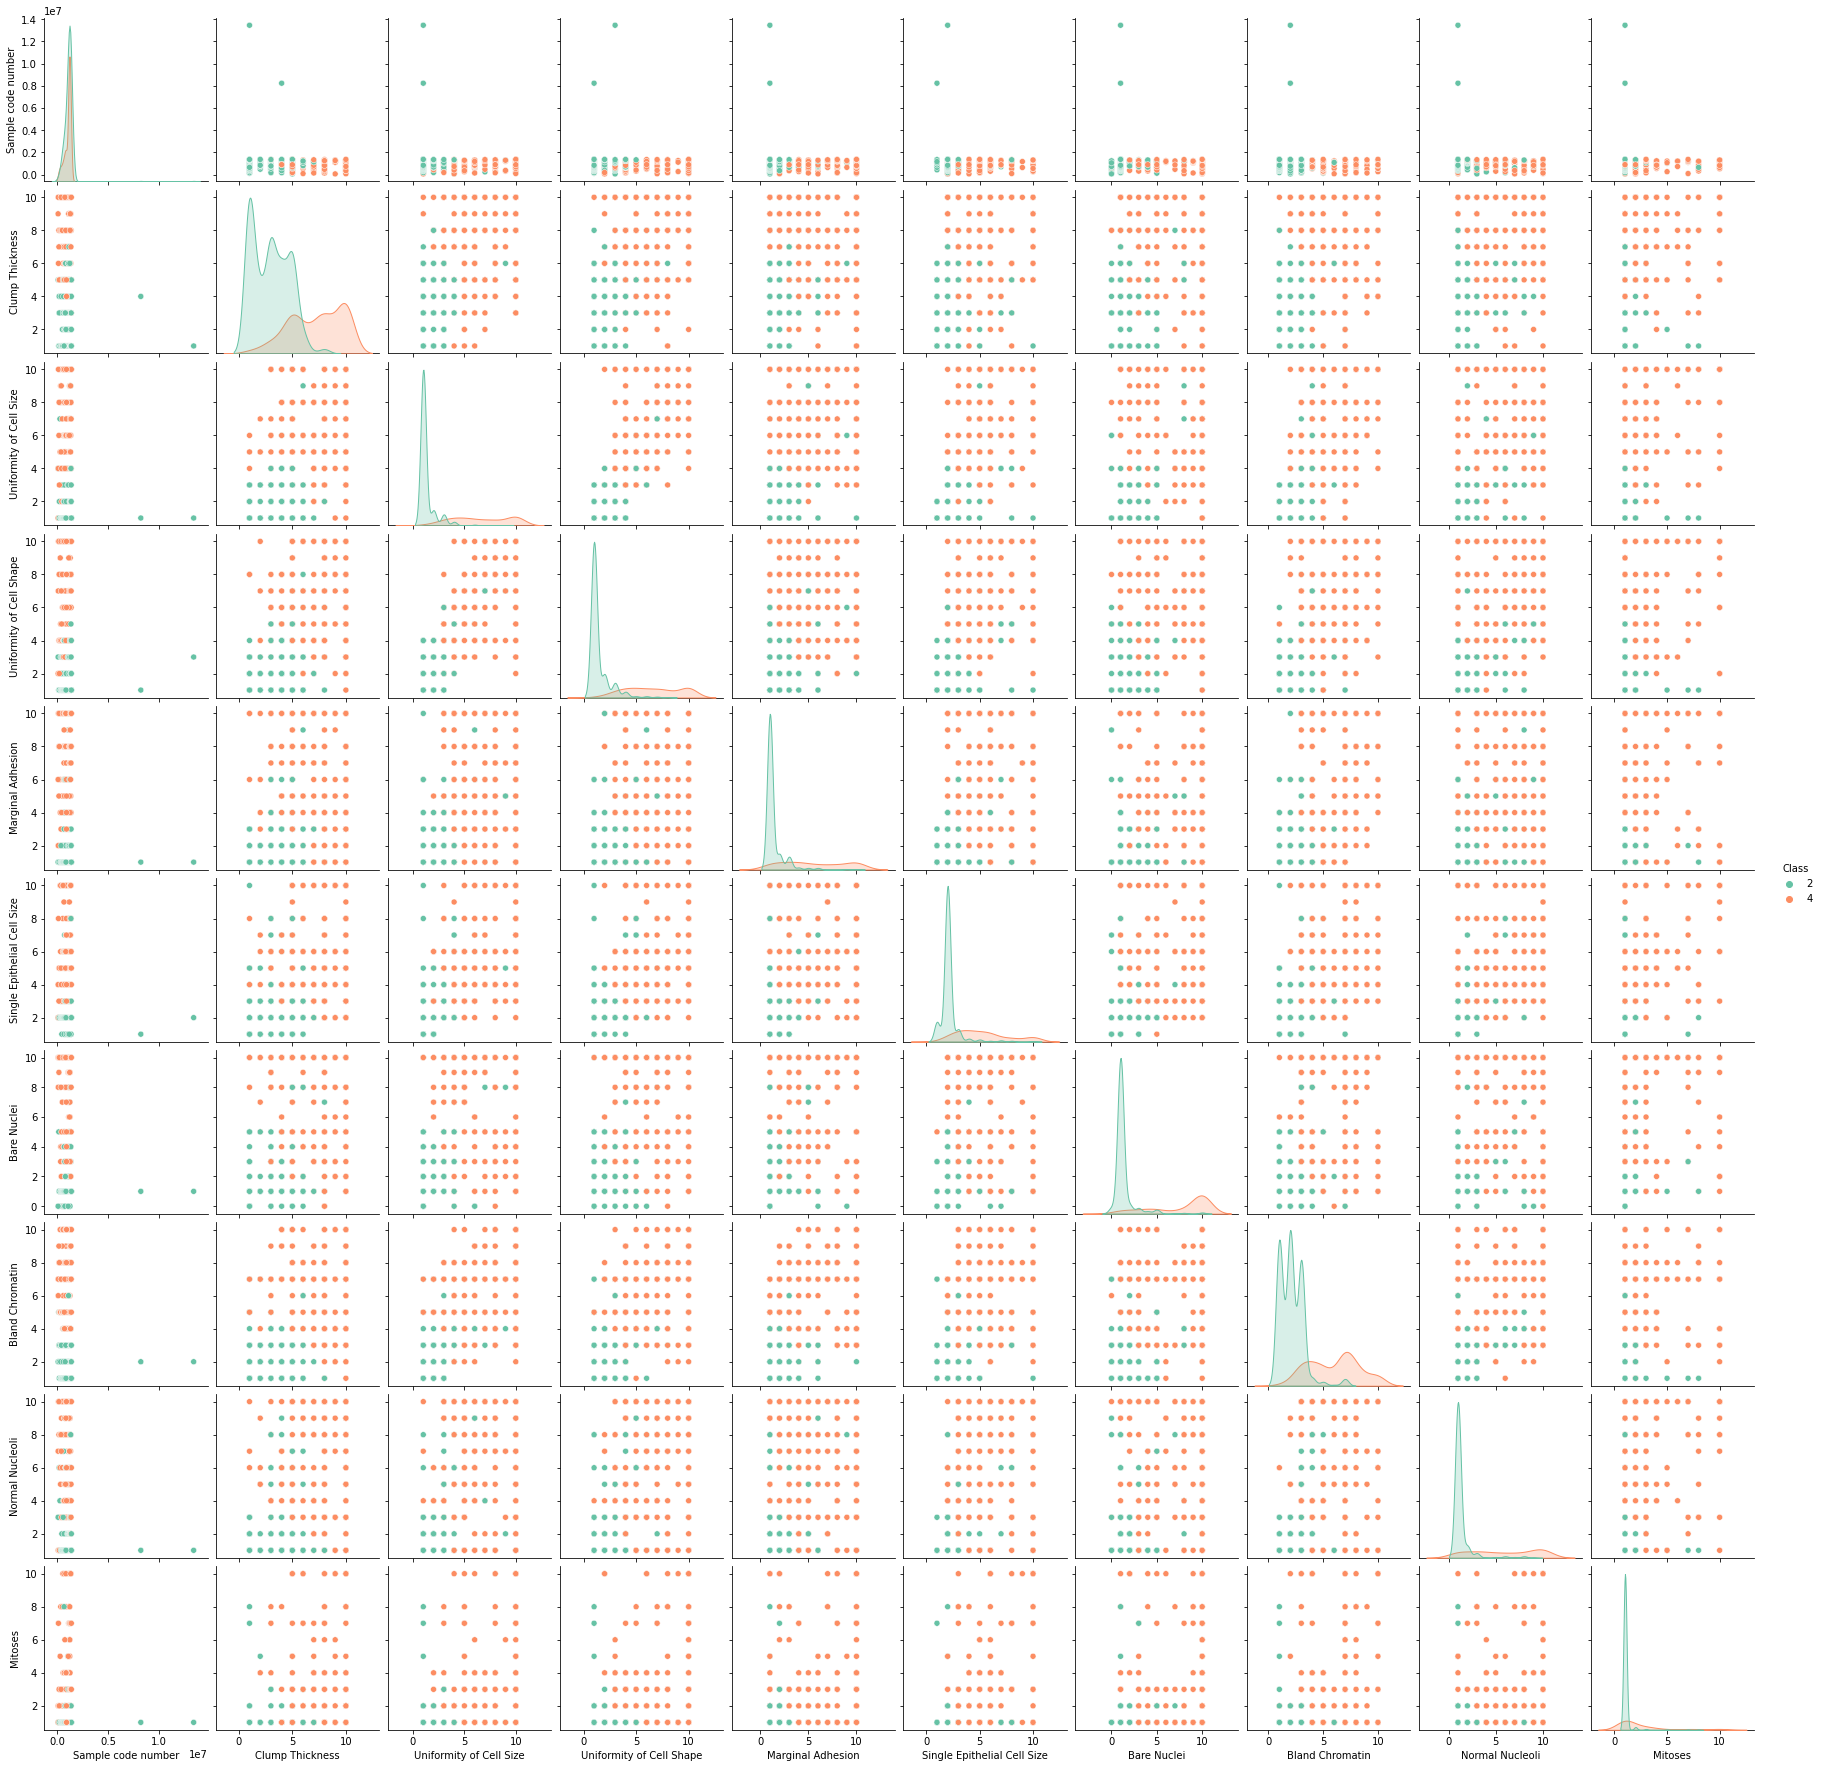

In [17]:
sns.pairplot(df,hue="Class", palette="Set2")
plot.show()

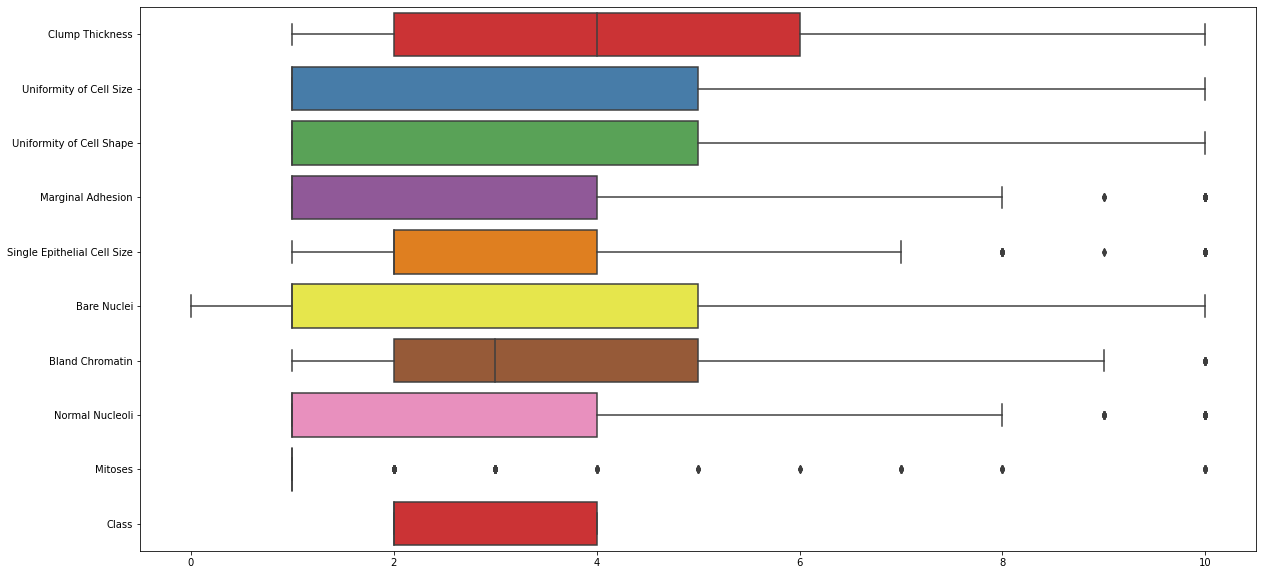

In [18]:
plot.figure(figsize=(20,10))
ax = sns.boxplot(data = df[col_list], orient = "h", palette = "Set1")
plot.show()

# 3.	Data Pre-processing and cleaning

a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.
b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.
c.	Do the correlational analysis on the dataset. Provide a visualization for the same.

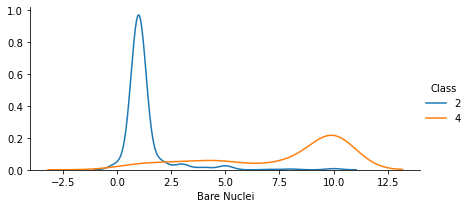

In [19]:
##Based on above analysis we had only Bare Nuclei with missing values represented by '?'
##Checking for distribution

grid=sns.FacetGrid(df, hue="Class",aspect=2)
grid.map(sns.kdeplot, 'Bare Nuclei')
grid.add_legend()

In [20]:
index_names = df[ (df['Bare Nuclei'] == 0) ].index 
df.drop(index_names, inplace = True) 

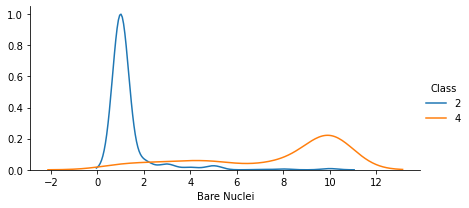

In [21]:
##Checking for distribution post drop

grid=sns.FacetGrid(df, hue="Class",aspect=2)
grid.map(sns.kdeplot, 'Bare Nuclei')
grid.add_legend()

[]

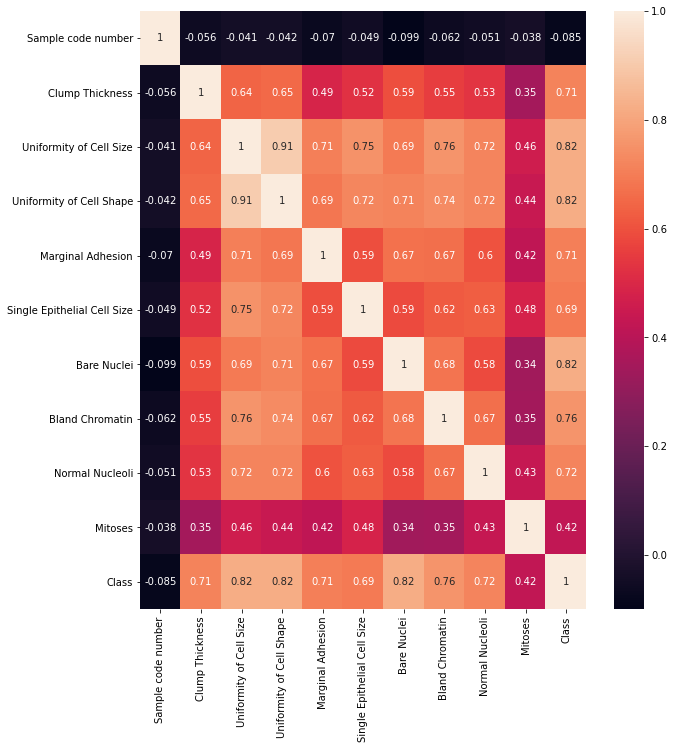

In [22]:
## Correlation Analysis
plot.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plot.plot()

# 4.	Data Preparation

a.	Do the final feature selection and extract them into Column X and the class label into Column into Y.
b.	Split the dataset into training and test sets.

In [23]:
#SelectKBest-to select k best features
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [24]:
ind_col=[col for col in df.columns if col!='Class']
dep_col='Class'

In [25]:
## Removing Sample Code number for analysis as there is no correlation on this field.
ind_col.remove('Sample code number')
print(ind_col)

['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


In [26]:
X=df[ind_col]
y=df[dep_col]

In [27]:
ordered_rank_features=SelectKBest(score_func=chi2,k=5)
ordered_feature=ordered_rank_features.fit(X,y)

In [28]:
ordered_feature

SelectKBest(k=5, score_func=<function chi2 at 0x0000024261E775E0>)

In [29]:
ordered_feature.scores_

array([ 624.13570418, 1370.06458731, 1279.76770412,  986.41787922,
        497.53676321, 1729.0661744 ,  682.97823856, 1143.8667119 ,
        228.99434634])

In [30]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,624.135704
1,1370.064587
2,1279.767704
3,986.417879
4,497.536763
5,1729.066174
6,682.978239
7,1143.866712
8,228.994346


In [31]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,Clump Thickness
1,Uniformity of Cell Size
2,Uniformity of Cell Shape
3,Marginal Adhesion
4,Single Epithelial Cell Size
5,Bare Nuclei
6,Bland Chromatin
7,Normal Nucleoli
8,Mitoses


In [32]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [33]:
features_rank

,0,Score
0,Clump Thickness,624.135704
1,Uniformity of Cell Size,1370.064587
2,Uniformity of Cell Shape,1279.767704
3,Marginal Adhesion,986.417879
4,Single Epithelial Cell Size,497.536763
5,Bare Nuclei,1729.066174
6,Bland Chromatin,682.978239
7,Normal Nucleoli,1143.866712
8,Mitoses,228.994346


In [34]:
#Higher the score is,more important feature is 
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Clump Thickness,624.135704
1,Uniformity of Cell Size,1370.064587
2,Uniformity of Cell Shape,1279.767704
3,Marginal Adhesion,986.417879
4,Single Epithelial Cell Size,497.536763
5,Bare Nuclei,1729.066174
6,Bland Chromatin,682.978239
7,Normal Nucleoli,1143.866712
8,Mitoses,228.994346


In [35]:
#fetch largest 10 values of Score column
features_rank.nlargest(6,'Score')

,Features,Score
5,Bare Nuclei,1729.066174
1,Uniformity of Cell Size,1370.064587
2,Uniformity of Cell Shape,1279.767704
7,Normal Nucleoli,1143.866712
3,Marginal Adhesion,986.417879
6,Bland Chromatin,682.978239


In [36]:
selected_columns=features_rank.nlargest(6,'Score')['Features'].values

In [37]:
X_new=df[selected_columns]

### Model Building

1.	Model Building
a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.
b.	 Train the model and print the training accuracy and loss values.

2.	Performance Evaluation
a.	Print the confusion matrix. Provide appropriate analysis for the same.
b.	Do the prediction for the test data and display the results for the inference. 


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [39]:
print(X_train.shape)
print(X_test.shape)

(512, 6)
(171, 6)


In [40]:
## check whether dataset is imbalance or not
y_train.value_counts()

2    335
4    177
Name: Class, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

# Logistic Regression

In [42]:
lg = LogisticRegression(random_state = 0)
lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
#predictin the test result
y_pred_lg = lg.predict(X_test) 

In [44]:
#calculate accuracy
score_lg = accuracy_score(y_pred_lg,y_test)
score_lg

0.9590643274853801

In [45]:
print("train score - " + str(lg.score(X_train, y_train)))
print("test score - " + str(lg.score(X_test, y_test)))

train score - 0.962890625
test score - 0.9590643274853801


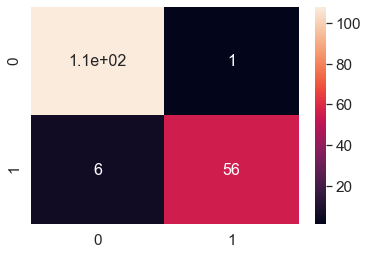

In [46]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,y_pred_lg)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_lg, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [47]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97       109
           4       0.98      0.90      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



# Kernal Naive Bayes

In [48]:
#fitting kernal Navie bayes to the training set 
knb = GaussianNB()
knb.fit(X_train,y_train)

GaussianNB()

In [49]:
#predictin the test result
y_pred_knb = knb.predict(X_test) 

In [50]:
#calculate accuracy
score_knb = accuracy_score(y_pred_knb,y_test)
score_knb

0.9707602339181286

In [51]:
print("train score - " + str(knb.score(X_train, y_train)))
print("test score - " + str(knb.score(X_test, y_test)))

train score - 0.9609375
test score - 0.9707602339181286


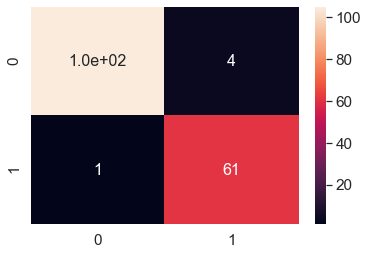

In [52]:
#Making the Confusion Matrix
cm_knb = confusion_matrix(y_test,y_pred_knb)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_knb, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [53]:
print(classification_report(y_test, y_pred_knb))

              precision    recall  f1-score   support

           2       0.99      0.96      0.98       109
           4       0.94      0.98      0.96        62

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [55]:
#predictin the test result
y_pred_rfc = rfc.predict(X_test) 

In [56]:
#calculate accuracy
score_rfc = accuracy_score(y_pred_rfc,y_test)
score_rfc

0.9532163742690059

In [57]:
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

train score - 0.96875
test score - 0.9532163742690059


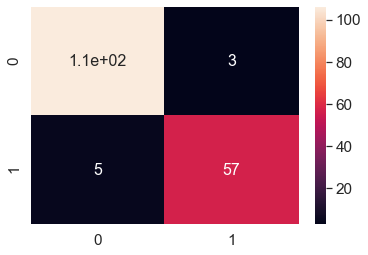

In [58]:
#Making the Confusion Matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_rfc, annot=True, annot_kws={"size": 16}) # font size

plot.show()

In [59]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       109
           4       0.95      0.92      0.93        62

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# End